In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Import countries shapefile
fp = os.path.join('data','ne_50m_admin_0_countries','ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)
countries.columns = countries.columns.str.lower()  # Simplify column names
countries = countries[['admin', 'type', 'geometry']]
countries.head(3)

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."


In [3]:
# Import Arctic communities GeoJSON directly from URL
URL = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(URL)
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [4]:
# Import country names from URL
URL = 'https://raw.githubusercontent.com/MEDS-eds-220/MEDS-eds-220-course/refs/heads/main/book/chapters/lesson-12-merge-data/country_names.csv'
country_names = pd.read_csv(URL)
country_names.head()

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden


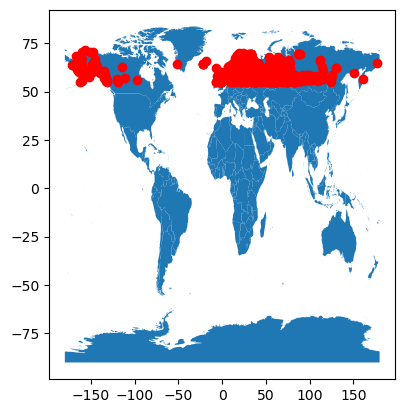

In [5]:
# Verify CRSs match
assert countries.crs == communities.crs

fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color='red')
plt.show()

In [7]:
# Create data frame with number of communities per country
n_comms = (communities.groupby('country')
                      .size()
                      .reset_index(name='n_communities'))

## `if-else` statements:

Our goal is to merge the `n_comms` per country with the `countries` geometries: to merge them we want to have at least one column in common 


In [8]:
set(countries.columns).intersection(n_comms.columns)

set()

In [ ]:
common_columns = set(countries.columns).intersection(n_comms.columns)

# Check 
if len(common_columns) != 0:
    print(f'Common columns: {common_columns}')
else:
    print('No column names in common.')


No columns in common.


## Check-in 

make the if else into a function

In [13]:
def check_common_columns(df1, df2):
    """
    Prints a message depending on whether df1 and df2 have columns in common. 
    """
    common_columns = set(df1.columns).intersection(df2.columns)

    # Check 
    if len(common_columns) != 0:
        print(f'Common columns: {common_columns}')
    else:
        print('No column names in common.')

In [14]:
check_common_columns(countries, n_comms)

No column names in common.


## Merging data frames

We want to:

1. use the `country_names` data frame to add countries to `n_comms` data. 
2. merge the resulting df with `country_names`

To merge `pandas.merge()` function:
```python
output_df = pd.merge(left_df,           # DF on left
                     right_df,          # DF on right 
                     how = type_of_join,
                     on = column_to_join)
```

In [16]:
n_comms = pd.merge(n_comms,
                   country_names,
                   how='left',
                   on='country')
n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
1,BY,8,Belarus
2,CA,7,Canada
3,DK,72,Denmark
4,EE,14,Estonia
5,FI,98,Finland
6,FO,1,Faroe Islands
7,GB,96,United Kingdom
8,GL,1,Greenland
9,IS,5,Iceland


In [17]:
check_common_columns(n_comms, countries)

Common columns: {'admin'}


In [24]:
arctic_countries = pd.merge(countries,
                   n_comms,
                   how='inner',
                   on='admin')
arctic_countries

,admin,type,geometry,country,n_communities
0,United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
1,United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
2,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
3,Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
4,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
5,Lithuania,Sovereign country,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55...",LT,26
6,Latvia,Sovereign country,"POLYGON ((26.59355 55.66753, 26.54287 55.67241...",LV,25
7,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
8,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
9,Estonia,Sovereign country,"MULTIPOLYGON (((27.35195 57.52812, 27.32656 57...",EE,14


In [29]:
arctic_countries = arctic_countries.set_index('admin')

In [30]:
# Check Aland Islands is nowhere in data frame
'Aland Islands' not in countries.values

True

In [31]:
arctic_countries.at['Finland', 'n_communities'] += 1

<Axes: >

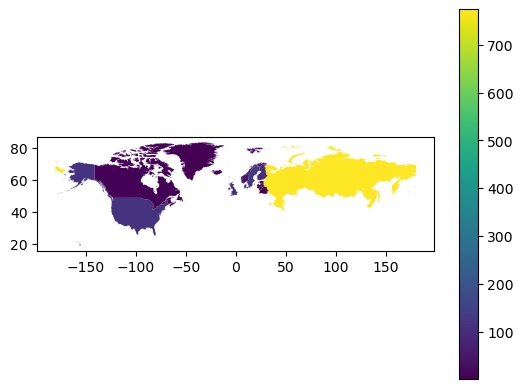

In [32]:
arctic_countries.plot(column='n_communities',
                      legend=True)

## Reprojection 
Reproject to ESPG:3413: NSIDC Sea ICE polar North

Change crs in geopandas 

Syntax:
`updated_geodf = geodf.to_crs(new_crs)

In [33]:
# Reproject to CRS optimized for Arctic region
arctic_countries = arctic_countries.to_crs('epsg:3413')

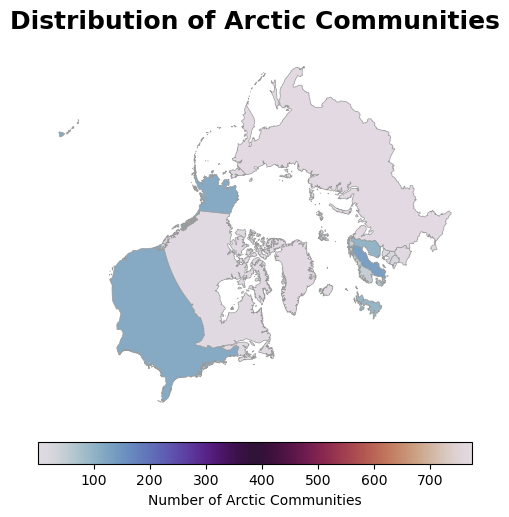

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic_countries.plot(
    ax=ax,
    column='n_communities',
    cmap='twilight',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()